In [1]:
import os
os.chdir('/rds/general/user/cb1319/home/GEOM3D/Geom3D/')


In [9]:
import importlib
import os
from geom3d.dev_scripts import run_training

importlib.reload(run_training)

os.chdir('/rds/general/user/cb1319/home/GEOM3D/Geom3D/')
%run /rds/general/user/cb1319/home/GEOM3D/Geom3D/src/geom3d/dev_scripts/run_training.py --model_name 'DimeNetPlusPlus' --num_molecules 80000 --max_epochs 100 --split 'smart' --target_name 'combined' --smart_dataset_size 20000 --lr_scheduler 'CosineAnnealingWarmRestarts' --batch_size '16' 



config loaded from /rds/general/user/cb1319/home/GEOM3D/Geom3D/smart_datasize_study/DimeNetPlusPlus_opt_combined_20000_smart
config saved at  /rds/general/user/cb1319/home/GEOM3D/Geom3D/smart_datasize_study/DimeNetPlusPlus_opt_combined_20000_smart
config loaded from /rds/general/user/cb1319/home/GEOM3D/Geom3D/smart_datasize_study/DimeNetPlusPlus_opt_combined_20000_smart
/rds/general/user/cb1319/home/GEOM3D/Geom3D/datasets/80000dataset_combined.pt
Model loaded:  DimeNetPlusPlus
Loading dataset split indices from /rds/general/user/cb1319/home/GEOM3D/Geom3D/smart_datasize_study/datasplit_20000_smart.npz
train_idx:  [32770 65538 32773 ... 32760 65532 32765]
valid_idx:  [57347 57348 49157 ... 49146 57340 73726]
test_idx:  [73728 32775 65546 ... 49136 65525 57341]
set()
set()
Number of training samples: 15689
Number of validation samples: 1963
Number of test samples: 1987


/rds/general/user/cb1319/home/anaconda3/envs/Geom3D/lib/python3.11/site-packages/lightning/pytorch/loggers/wandb.py:389: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
/rds/general/user/cb1319/home/anaconda3/envs/Geom3D/lib/python3.11/site-packages/lightning/fabric/connector.py:565: `precision=16` is supported for historical reasons but its usage is discouraged. Please set your precision to 16-mixed instead!
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
`Trainer(val_check_interval=1.0)` was configured so validation will run at the end of the training epoch..
/rds/general/user/cb1319/home/anaconda3/envs/Geom3D/lib/python3.11/site-packages/lightning/pytorch/callbacks/model_checkpoint.py:634: Checkpoin

Mixed precision training is activated.


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [2]

  | Name             | Type            | Params
-----------------------------------------------------
0 | molecule_3D_repr | DimeNetPlusPlus | 288 K 
-----------------------------------------------------
288 K     Trainable params
6         Non-trainable params
288 K     Total params
1.154     Total estimated model params size (MB)


Apply lr scheduler CosineAnnealingWarmRestarts


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/rds/general/user/cb1319/home/anaconda3/envs/Geom3D/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:492: Your `val_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test dataloaders.
/rds/general/user/cb1319/home/anaconda3/envs/Geom3D/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.
/rds/general/user/cb1319/home/anaconda3/envs/Geom3D/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Learning Rate for Epoch 0: 5.00000e-04


/rds/general/user/cb1319/home/anaconda3/envs/Geom3D/lib/python3.11/site-packages/lightning/pytorch/trainer/call.py:54: Detected KeyboardInterrupt, attempting graceful shutdown...
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [2]

  | Name             | Type            | Params
-----------------------------------------------------
0 | molecule_3D_repr | DimeNetPlusPlus | 288 K 
-----------------------------------------------------
288 K     Trainable params
6         Non-trainable params
288 K     Total params
1.154     Total estimated model params size (MB)


Apply lr scheduler CosineAnnealingWarmRestarts


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Learning Rate for Epoch 0: 5.00000e-04


In [4]:
import wandb

wandb.finish()

In [3]:
import optuna
import os

os.chdir('/rds/general/user/cb1319/home/GEOM3D/Geom3D/')
optuna.delete_study(study_name="", storage="sqlite:///./hp_search/my_study.db")

In [1]:
%matplotlib inline

In [ ]:
import importlib
from geom3d.inference_tests import inference_test_models

config_dir = "/rds/general/user/cb1319/home/GEOM3D/Geom3D/performance_eval_test/SchNet_IP_80000"
chkpt_path = "/rds/general/user/cb1319/home/GEOM3D/Geom3D/performance_eval_test/SchNet_IP_80000/epoch=4-val_loss=0.17-other_metric=0.00-v1.ckpt"

importlib.reload(inference_test_models)
inference_test_models.plot_training_results(chkpt_path, config_dir)

In [ ]:
import os
import torch
import copy
from geom3d import train_models
from geom3d.train_models import SchNet, DimeNet, DimeNetPlusPlus, GemNet, SphereNet, SphereNetPeriodic, PaiNN, Pymodel
from geom3d.train_models import read_config, load_data, train_val_test_split, model_setup
import importlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

config_dir = "/rds/general/user/cb1319/home/GEOM3D/Geom3D/performance_eval_test/SchNet_IP_80000"
chkpt_path = "/rds/general/user/cb1319/home/GEOM3D/Geom3D/performance_eval_test/SchNet_IP_80000/epoch=4-val_loss=0.17-other_metric=0.00-v1.ckpt"

"""
Function to plot the training results
"""
import numpy as np
config = read_config(config_dir)
np.random.seed(config["seed"])
torch.cuda.manual_seed_all(config["seed"])
torch.manual_seed(config["seed"])

config["device"] = "cuda:0" if torch.cuda.is_available() else "cpu"

print('checkpoint used:', chkpt_path)

# try:
#     pymodel = Pymodel.load_from_checkpoint(chkpt_path)
#     pymodel.freeze()
# except (TypeError, KeyError):

# to get the try and except start indent here
checkpoint = torch.load(chkpt_path)

model, graph_pred_linear = model_setup(config)
print("Model loaded: ", config["model_name"])

# Pass the model and graph_pred_linear to the Pymodel constructor
pymodel = Pymodel(model, graph_pred_linear, config)

# Load the state dictionary
pymodel.load_state_dict(state_dict=checkpoint['state_dict'])

# Set the model to evaluation mode
pymodel.eval()

# end indent here
dataset = load_data(config)
np.random.seed(config["seed"])
torch.cuda.manual_seed_all(config["seed"])

print('y_true', dataset[0].y)

# removed here because these bade the code error
# pymodel_cpu = copy.deepcopy(pymodel).to('cpu')
print(dataset[0].to('cpu').y)
# print('y_pred_cpu', pymodel_cpu(dataset[0].to('cpu')))

# Move pymodel to the same device as the input data
pymodel = pymodel.to(config["device"])

# removed code here because it made the code error
# print('y_pred', pymodel(dataset[0].to(config["device"])))

train_loader, val_loader, test_loader = train_val_test_split(
    dataset, config=config, batch_size=config["batch_size"]
)

In [ ]:
# Get the y values from the dataset for setting plot axes
y_values = [data.y for data in dataset]
y_min = min(y_values)
y_max = max(y_values)

fig, axis = plt.subplots(1, 3, figsize=(15, 5))
for id, loader in enumerate([train_loader, val_loader, test_loader]):
    axis[id].set_ylabel('y_pred')
    axis[id].set_xlabel('y_true')
    axis[id].set_xlim(y_min, y_max)  # Set x-axis limits based on min and max y values
    axis[id].set_ylim(y_min, y_max)  # Set y-axis limits based on min and max y values

    for x in loader:
        with torch.no_grad():
            Y_pred = pymodel(x.to(config["device"]))
        break
    axis[id].scatter(x.y.to('cpu'), Y_pred.to('cpu').detach())
    axis[id].plot(x.y.to('cpu'), x.y.to('cpu'))
    axis[id].set_title(['train set', 'validation set', 'test set'][id])
plt.show()
plt.savefig('training_results.png')

# calculate the mean absolute error
y_true = []
y_pred = []
for x in test_loader:
    with torch.no_grad():
        Y_pred = pymodel(x.to(config["device"]))
    y_true.append(x.y.to('cpu'))
    y_pred.append(Y_pred.to('cpu').detach())
y_true = torch.cat(y_true)
y_pred = torch.cat(y_pred)
mae = mean_absolute_error(y_true, y_pred)
print('Mean Absolute Error (MAE) on test_set:', mae)

# calculate the root mean squared error
from math import sqrt
rmse = sqrt(mean_squared_error(y_true, y_pred))
print('Root Mean Squared Error (RMSE) on test_set:', rmse)

In [ ]:
# create hpc scripts for fragment experiment

import os

# Specify the directory path
directory_path = '/rds/general/user/cb1319/home/hpc_script_fragment_exp/'

model_name = ['SchNet', 'PaiNN', 'SphereNet', 'DimeNet', 'Equiformer', 'DimeNetPlusPlus']
cluster = ['1', '2', '3', '4', '5', '6']
target_name = 'IP'

# Create the directory if it doesn't exist
os.makedirs(directory_path, exist_ok=True)

for i in range(len(model_name)):
    for j in range(len(cluster)):
        # set the batch size and learning rate scheduler
        if model_name[i] == 'SphereNet':
            lr_scheduler = 'CosineAnnealingWarmRestarts'
            batch_size = '4'
        elif model_name[i] == 'PaiNN':
            lr_scheduler = 'CosineAnnealingLR'
            batch_size = '16'
        elif model_name[i] == 'SchNet':
            lr_scheduler = 'CosineAnnealingWarmRestarts'
            batch_size = '16'
        elif model_name[i] == 'DimeNet':
            lr_scheduler = 'CosineAnnealingLR'
            batch_size = '20'
        elif model_name[i] == 'Equiformer':
            lr_scheduler = 'CosineAnnealingWarmRestarts'
            batch_size = '20'
        elif model_name[i] == 'DimeNetPlusPlus':
            lr_scheduler = 'CosineAnnealingWarmRestarts'
            batch_size = '16'


        # Specify the script content
        script = "#!/bin/bash \n"+\
            "#PBS -l walltime=72:00:00 \n"+\
            "#PBS -l select=1:ncpus=4:mem=100gb:ngpus=1:gpu_type=RTX6000 \n"+\
            f"#PBS -N {model_name[i]}_opt_cluster_{cluster[j]}_{target_name} \n"+\
            " \n"+\
            "cd /rds/general/user/cb1319/home/GEOM3D/Geom3D/ \n"+\
            " \n"+\
            "module load anaconda3/personal \n"+ \
            "module load tools/prod  \n"+ \
            "module load Python/3.11.3-GCCcore-12.3.0  \n"+ \
            " \n"+\
            "source activate Geom3D     \n"+\
            f"python3 /rds/general/user/cb1319/home/GEOM3D/Geom3D/src/geom3d/dev_scripts/run_training.py --model_name '{str(model_name[i])}' --num_molecules 80000 --max_epochs 100 --split 'fragment_scaffold' --target_name '{str(target_name)}' --test_set_fragment_cluster {cluster[j]} --lr_scheduler '{str(lr_scheduler)}' --batch_size '{str(batch_size)}' \n"

        # Save the script to a file
        file_path = os.path.join(directory_path, f'{model_name[i]}_opt_cluster_{cluster[j]}_{target_name}.sh')
        with open(file_path, 'wb') as f:
            f.write( bytes(script, 'utf-8') )

        print(f"Script saved to: {file_path}")

        if i == len(model_name)-1 and j == len(cluster)-1:
            print(script)
    # !qsub -e ./cache -o ./cache /rds/general/user/cb1319/home/hpc_script_datasize_study/{model_name}_opt_{num_mols[i]}.sh
    # !qstat

In [3]:
# create hpc scripts for smart dataset size experiment

import os

# Specify the directory path
directory_path = '/rds/general/user/cb1319/home/hpc_script_smart_datasize/'

model_name = ['SchNet', 'PaiNN', 'SphereNet', 'DimeNet', 'Equiformer', 'DimeNetPlusPlus']
smart_size = ['5000', '10000', '40000', '80000']
target_name = 'combined'

# Create the directory if it doesn't exist
os.makedirs(directory_path, exist_ok=True)

for i in range(len(model_name)):
    for j in range(len(smart_size)):
        # set the batch size and learning rate scheduler
        if model_name[i] == 'SphereNet':
            lr_scheduler = 'CosineAnnealingWarmRestarts'
            batch_size = '4'
        elif model_name[i] == 'PaiNN':
            lr_scheduler = 'CosineAnnealingLR'
            batch_size = '16'
        elif model_name[i] == 'SchNet':
            lr_scheduler = 'CosineAnnealingWarmRestarts'
            batch_size = '16'
        elif model_name[i] == 'DimeNet':
            lr_scheduler = 'CosineAnnealingLR'
            batch_size = '20'
        elif model_name[i] == 'Equiformer':
            lr_scheduler = 'CosineAnnealingWarmRestarts'
            batch_size = '20'
        elif model_name[i] == 'DimeNetPlusPlus':
            lr_scheduler = 'CosineAnnealingWarmRestarts'
            batch_size = '16'


        # Specify the script content
        script = "#!/bin/bash \n"+\
            "#PBS -l walltime=72:00:00 \n"+\
            "#PBS -l select=1:ncpus=4:mem=100gb:ngpus=1:gpu_type=RTX6000 \n"+\
            f"#PBS -N {model_name[i]}_opt_{target_name}_{smart_size[j]}_smart \n"+\
            " \n"+\
            "cd /rds/general/user/cb1319/home/GEOM3D/Geom3D/ \n"+\
            " \n"+\
            "module load anaconda3/personal \n"+ \
            "module load tools/prod  \n"+ \
            "module load Python/3.11.3-GCCcore-12.3.0  \n"+ \
            " \n"+\
            "source activate Geom3D     \n"+\
            f"python3 /rds/general/user/cb1319/home/GEOM3D/Geom3D/src/geom3d/dev_scripts/run_training.py --model_name '{str(model_name[i])}' --num_molecules 80000 --max_epochs 100 --split 'smart' --target_name '{str(target_name)}' --smart_dataset_size {smart_size[j]} --lr_scheduler '{str(lr_scheduler)}' --batch_size '{str(batch_size)}' \n"

        # Save the script to a file
        file_path = os.path.join(directory_path, f'{model_name[i]}_opt_{target_name}_{smart_size[j]}_smart.sh')
        with open(file_path, 'wb') as f:
            f.write( bytes(script, 'utf-8') )

        print(f"Script saved to: {file_path}")

        if i == len(model_name)-1 and j == len(smart_size)-1:
            print(script)
    # !qsub -e ./cache -o ./cache /rds/general/user/cb1319/home/hpc_script_datasize_study/{model_name}_opt_{num_mols[i]}.sh
    # !qstat

Script saved to: /rds/general/user/cb1319/home/hpc_script_smart_datasize/SchNet_opt_combined_5000_smart.sh
Script saved to: /rds/general/user/cb1319/home/hpc_script_smart_datasize/SchNet_opt_combined_10000_smart.sh
Script saved to: /rds/general/user/cb1319/home/hpc_script_smart_datasize/SchNet_opt_combined_40000_smart.sh
Script saved to: /rds/general/user/cb1319/home/hpc_script_smart_datasize/SchNet_opt_combined_80000_smart.sh
Script saved to: /rds/general/user/cb1319/home/hpc_script_smart_datasize/PaiNN_opt_combined_5000_smart.sh
Script saved to: /rds/general/user/cb1319/home/hpc_script_smart_datasize/PaiNN_opt_combined_10000_smart.sh
Script saved to: /rds/general/user/cb1319/home/hpc_script_smart_datasize/PaiNN_opt_combined_40000_smart.sh
Script saved to: /rds/general/user/cb1319/home/hpc_script_smart_datasize/PaiNN_opt_combined_80000_smart.sh
Script saved to: /rds/general/user/cb1319/home/hpc_script_smart_datasize/SphereNet_opt_combined_5000_smart.sh
Script saved to: /rds/general/us

In [3]:
# submit the hpc scripts for fragment experiment

model_name = ['SchNet', 'PaiNN', 'SphereNet', 'DimeNet', 'Equiformer', 'DimeNetPlusPlus']
smart_size = ['5000', '10000', '40000', '80000']
target_name = 'combined'

for i in range(len(model_name)):
    for j in range(len(smart_size)):
        !qsub -e ./hpc_script_smart_datasize/cache -o ./hpc_script_smart_datasize/cache /rds/general/user/cb1319/home/hpc_script_smart_datasize/{model_name[i]}_opt_{target_name}_{smart_size[j]}_smart.sh

!qstat

/bin/bash: which: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `which'
/bin/bash: module: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `module'
/bin/bash: scl: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `scl'
/bin/bash: ml: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `ml'
/bin/sh: which: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `which'
/bin/sh: ml: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `ml'
/bin/sh: scl: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `scl'
/bin/sh: module: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `module'
sh: which: line 1: syntax error: unexpected end of file


In [ ]:
from geom3d.train_models import *
import torch
import copy

from geom3d.utils import fragment_scaffold_split
from geom3d.utils import database_utils


import os
os.chdir('/rds/general/user/cb1319/home/GEOM3D/Geom3D/')
config_dir = os.getcwd()+"/fragment_experiment/SchNet_opt_combined_80000"
config = read_config(config_dir)

dataset_path = "/rds/general/user/cb1319/home/GEOM3D/Geom3D/datasets/80000dataset_combined.pt"
dataset = torch.load(dataset_path)

config loaded from /rds/general/user/cb1319/home/GEOM3D/Geom3D/fragment_experiment_2/SchNet_opt_fosc1_80000_3/
checkpoint used: /rds/general/user/cb1319/home/GEOM3D/Geom3D/fragment_experiment_2/SchNet_opt_fosc1_80000_3/epoch=95-val_loss=0.32-other_metric=0.00.ckpt
Model loaded:  SchNet
/rds/general/user/cb1319/home/GEOM3D/Geom3D/datasets/80000dataset_fosc1.pt
y_true 2.2442
2.2442
Loading dataset split indices from /rds/general/user/cb1319/home/GEOM3D/Geom3D/fragment_experiment_2/datasplit_80000_fragment_scaffold_threshold_0.067_cluster_3.npz
train_idx:  [20696 34077 19517 ... 12327 47418 23999]
valid_idx:  [78532  8666 64529 ... 62013  1403 25752]
test_idx:  [    1     2     3 ... 79997 79998 79999]
Number of training samples: 43825
Number of validation samples: 5479
Number of test samples: 30696
pymodel device cuda:0
Target:  fosc1


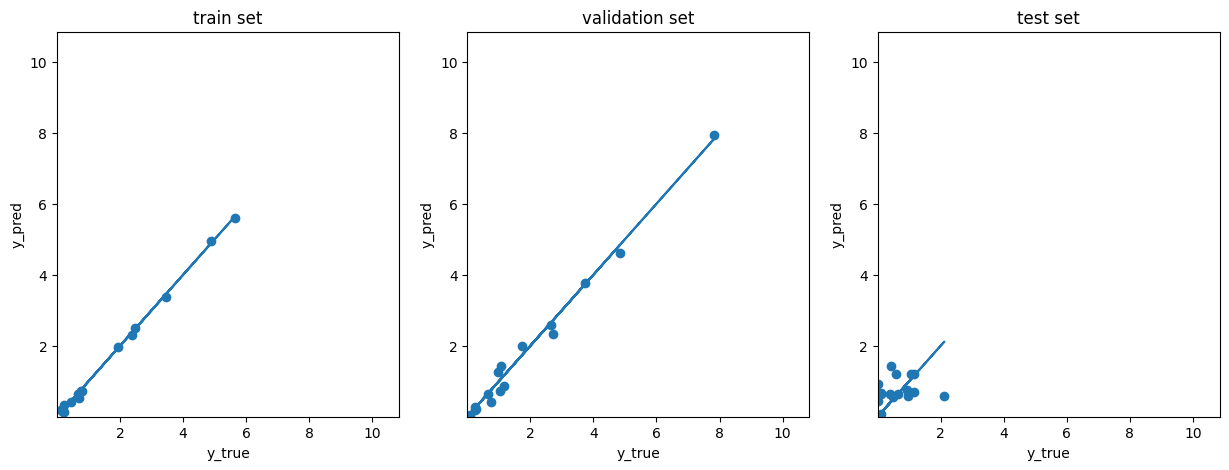

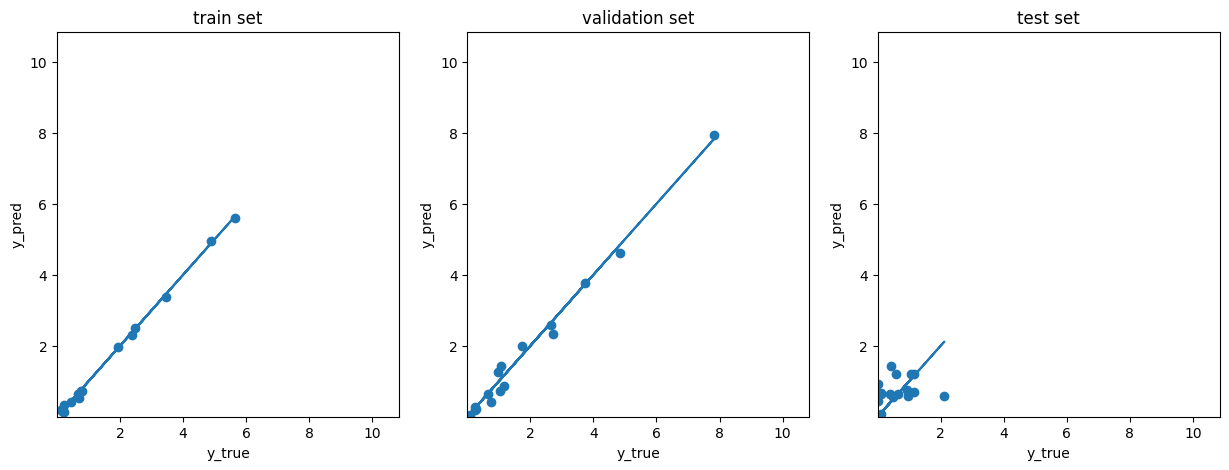

Mean Absolute Error (MAE) on test_set: 0.71087885
Mean Squared Error (MSE) on test_set: 1.362605


(<torch_geometric.loader.dataloader.DataLoader at 0x14ef22860e90>,
 0.71087885,
 1.362605)

In [5]:
import importlib
from geom3d.inference_tests import inference_test_models

importlib.reload(inference_test_models)

config_dir = "/rds/general/user/cb1319/home/GEOM3D/Geom3D/fragment_experiment_2/SchNet_opt_fosc1_80000_3/"
chkpt_path = "/rds/general/user/cb1319/home/GEOM3D/Geom3D/fragment_experiment_2/SchNet_opt_fosc1_80000_3/epoch=95-val_loss=0.32-other_metric=0.00.ckpt"

importlib.reload(inference_test_models)

inference_test_models.plot_training_results(chkpt_path, config_dir)

In [7]:
from geom3d.utils import database_utils
from pathlib import Path

df_path = Path(
    '/rds/general/user/cb1319/home/GEOM3D/STK_path/', "data/output/Full_dataset/",  "df_total_subset_16_11_23.csv"
)
df_precursors_path = Path(
    '/rds/general/user/cb1319/home/GEOM3D/STK_path/',
    "data/output/Prescursor_data/",
    "calculation_data_precursor_071123_clean.pkl",
)

print(f"Loading data from {df_path} and {df_precursors_path}")

df_total, df_precursors = database_utils.load_data_from_file(
    df_path, df_precursors_path
)

Loading data from /rds/general/user/cb1319/home/GEOM3D/STK_path/data/output/Full_dataset/df_total_subset_16_11_23.csv and /rds/general/user/cb1319/home/GEOM3D/STK_path/data/output/Prescursor_data/calculation_data_precursor_071123_clean.pkl


In [ ]:
from geom3d.train_models import *
import torch
import copy
from geom3d.utils import fragment_scaffold_split
from geom3d.utils import database_utils
import os
import torch
from torch_geometric.data import Data

dataset = torch.load('/rds/general/user/cb1319/home/GEOM3D/Geom3D/datasets/80000dataset_ES1.pt')
os.chdir('/rds/general/user/cb1319/home/GEOM3D/Geom3D/')
config_dir = os.getcwd()+"/fragment_experiment/SchNet_opt_combined_80000"
config = read_config(config_dir)

In [10]:
morgan_keys = fragment_scaffold_split.cluster_analysis(dataset, config, 0.067)


clustering done with metric: rogerstanimoto
Index(['InChIKey', 'Morgan_Fingerprint'], dtype='object')
Clustering dataset with threshold 0.067
Number of clusters: 10
Number of molecules in each cluster for morgan fp: {1: 99, 2: 51, 3: 7, 4: 29, 5: 27, 6: 3, 7: 60, 8: 19, 9: 8, 10: 7}
Number of molecules in each cluster after merging small clusters: {1: 99, 2: 51, 3: 36, 4: 30, 5: 60, 6: 34}


In [ ]:
morgan_keys2 = pd.read_pickle('/rds/general/user/cb1319/home/GEOM3D/Geom3D/fragment_experiment/fragment_exp_results.pkl')


Number of molecules: 34


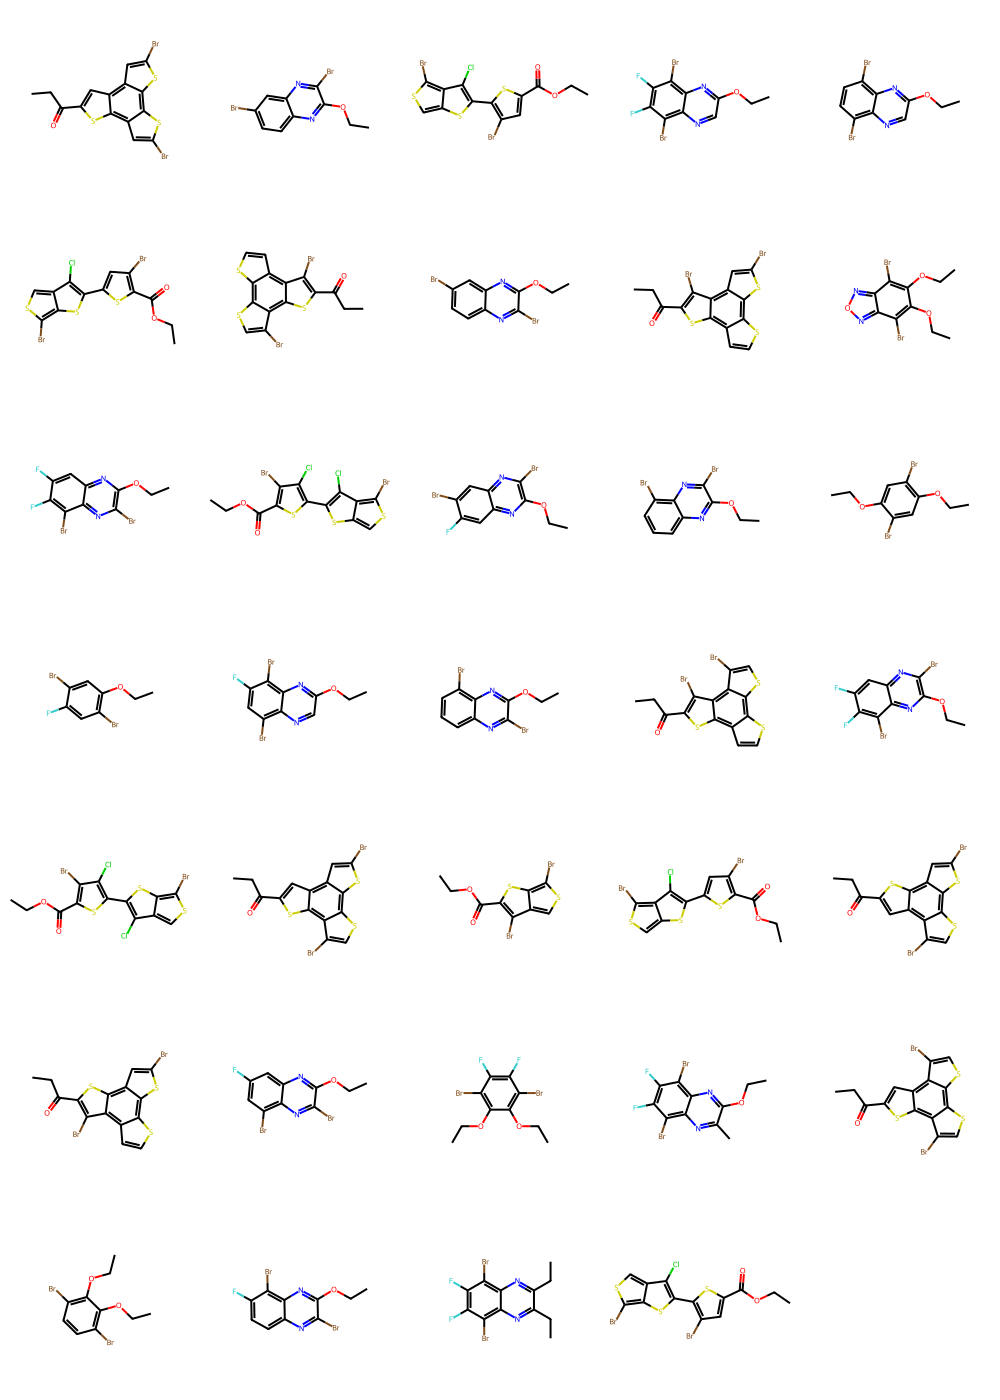

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw

# Assuming you have a list of model names
model_names = ['SchNet', 'PaiNN', 'Equiformer', 'SphereNet', 'DimeNetPlusPlus', 'DimeNet']  # Update with your actual model names
target = 'fosc1'

# Load the morgan_keys dataframe
morgan_keys2 = pd.read_pickle('/rds/general/user/cb1319/home/GEOM3D/Geom3D/fragment_experiment/fragment_exp_results.pkl')

cluster1_indices = morgan_keys[morgan_keys['Cluster'] == 6].index

# Function to collect molecules for each group (worst/best)
def get_molecules(indices):
    molecules = []
    for index in indices:
        smiles = morgan_keys2['smiles'].iloc[index]
        molecules.append(Chem.MolFromSmiles(smiles))
    return molecules

# Get molecules for each set
molecules = get_molecules(cluster1_indices)

print('Number of molecules:', len(molecules))
print(molecules[0])

# Visualize molecules using MolsToGridImage and legend should be corresponding inchikeys
img = Draw.MolsToGridImage(molecules, molsPerRow=5, subImgSize=(200, 200))

# show the img
display(img)

In [35]:
# Create a dictionary to store the mapping between InChIKey and y values
inchikey_to_y = {}

# Iterate through each data instance in the dataset
for data in dataset:
    # Assuming InChIKey is an attribute of the data
    inchikey = data.InChIKey
    y = data.y
    
    # Add the mapping to the dictionary
    inchikey_to_y[inchikey] = y

# print the first 5 items in the dictionary
for i, (inchikey, y) in enumerate(inchikey_to_y.items()):
    print(f"Item {i + 1} - InChIKey: {inchikey}, y: {y}")
    if i == 4:
        break

Item 1 - InChIKey: GUHPJJDNBLEPFG-UHFFFAOYSA-N, y: 3.99399995803833
Item 2 - InChIKey: AYKWIKCFFPEIRC-UHFFFAOYSA-N, y: 3.9700000286102295
Item 3 - InChIKey: CCTZVUFBMUDPRS-UHFFFAOYSA-N, y: 3.309000015258789
Item 4 - InChIKey: ZFCVPMKOIMXOMC-UHFFFAOYSA-N, y: 3.9670000076293945
Item 5 - InChIKey: YOUVGTYSMXXLCR-JNEBBEIESA-N, y: 3.865000009536743


In [56]:
# check if the associated ES1 value is correctly associated to the correct InChIKey (between df_total and the .pt file)
import pandas as pd
import numpy as np

# make a dictionary of the InChIKeys and their associated y values in df_total for ES1, fosc1 and IP
inchikey_to_y_df_total = {}
for i in range(len(df_total)):
    inchikey = df_total['InChIKey'].iloc[i]
    y_ES1 = df_total['ES1'].iloc[i]
    y_fosc1 = df_total['fosc1'].iloc[i]
    y_IP = df_total['ionisation potential (eV)'].iloc[i]
    inchikey_to_y_df_total[inchikey] = [y_ES1, y_fosc1, y_IP]




In [57]:
# go into the .pt files and change the y values to the correct ones from the df_total

# load the .pt files
import torch
from torch_geometric.data import Data

# load the .pt files
dataset_ES1 = torch.load('/rds/general/user/cb1319/home/GEOM3D/Geom3D/datasets/80000dataset_ES1.pt')
dataset_fosc1 = torch.load('/rds/general/user/cb1319/home/GEOM3D/Geom3D/datasets/80000dataset_fosc1.pt')
dataset_IP = torch.load('/rds/general/user/cb1319/home/GEOM3D/Geom3D/datasets/80000dataset_IP.pt')

dataset_radius_ES1 = torch.load('/rds/general/user/cb1319/home/GEOM3D/Geom3D/datasets/80000dataset_radius_ES1.pt')
dataset_radius_fosc1 = torch.load('/rds/general/user/cb1319/home/GEOM3D/Geom3D/datasets/80000dataset_radius_fosc1.pt')
dataset_radius_IP = torch.load('/rds/general/user/cb1319/home/GEOM3D/Geom3D/datasets/80000dataset_radius_IP.pt')


In [64]:
# make a loop to change the y values in the .pt files to the correct ones from the df_total

targets = ['ES1', 'fosc1', 'IP']
datasets = [dataset_ES1, dataset_fosc1, dataset_IP, dataset_radius_ES1, dataset_radius_fosc1, dataset_radius_IP]

for i in range(len(datasets)):
    for j, data in enumerate(datasets[i]):
        inchikey = data.InChIKey
        if datasets[i] == dataset_ES1 or datasets[i] == dataset_radius_ES1:
            data.y = float(inchikey_to_y_df_total[inchikey][0])
        elif datasets[i] == dataset_fosc1 or datasets[i] == dataset_radius_fosc1:
            data.y = float(inchikey_to_y_df_total[inchikey][1])
        elif datasets[i] == dataset_IP or datasets[i] == dataset_radius_IP:
            data.y = float(inchikey_to_y_df_total[inchikey][2])

In [65]:
# print the first 5 items in the each dataset and see if they match the correct y values in df_total
for i in range(len(datasets)):
    print(f"Dataset {i + 1}:")
    for j, data in enumerate(datasets[i]):
        print(f"Sample {j + 1} - InChIKey: {data.InChIKey}, y: {data.y}, y_true: {inchikey_to_y_df_total[data.InChIKey]}")
        if j == 4:
            break

Dataset 1:
Sample 1 - InChIKey: GUHPJJDNBLEPFG-UHFFFAOYSA-N, y: 2.888, y_true: [2.888, 2.2442, 6.4572]
Sample 2 - InChIKey: AYKWIKCFFPEIRC-UHFFFAOYSA-N, y: 3.613, y_true: [3.613, 2.54, 6.2304]
Sample 3 - InChIKey: CCTZVUFBMUDPRS-UHFFFAOYSA-N, y: 3.397, y_true: [3.397, 0.6596, 5.8611]
Sample 4 - InChIKey: ZFCVPMKOIMXOMC-UHFFFAOYSA-N, y: 3.002, y_true: [3.002, 0.4439, 6.6408]
Sample 5 - InChIKey: YOUVGTYSMXXLCR-JNEBBEIESA-N, y: 2.4, y_true: [2.4, 0.6148, 7.2053]
Dataset 2:
Sample 1 - InChIKey: GUHPJJDNBLEPFG-UHFFFAOYSA-N, y: 2.2442, y_true: [2.888, 2.2442, 6.4572]
Sample 2 - InChIKey: AYKWIKCFFPEIRC-UHFFFAOYSA-N, y: 2.54, y_true: [3.613, 2.54, 6.2304]
Sample 3 - InChIKey: CCTZVUFBMUDPRS-UHFFFAOYSA-N, y: 0.6596, y_true: [3.397, 0.6596, 5.8611]
Sample 4 - InChIKey: ZFCVPMKOIMXOMC-UHFFFAOYSA-N, y: 0.4439, y_true: [3.002, 0.4439, 6.6408]
Sample 5 - InChIKey: YOUVGTYSMXXLCR-JNEBBEIESA-N, y: 0.6148, y_true: [2.4, 0.6148, 7.2053]
Dataset 3:
Sample 1 - InChIKey: GUHPJJDNBLEPFG-UHFFFAOYSA-N, y: 6

In [66]:
# save the datasets with the correct y values to the same .pt file locations
torch.save(dataset_ES1, '/rds/general/user/cb1319/home/GEOM3D/Geom3D/datasets/80000dataset_ES1.pt')
torch.save(dataset_fosc1, '/rds/general/user/cb1319/home/GEOM3D/Geom3D/datasets/80000dataset_fosc1.pt')
torch.save(dataset_IP, '/rds/general/user/cb1319/home/GEOM3D/Geom3D/datasets/80000dataset_IP.pt')

torch.save(dataset_radius_ES1, '/rds/general/user/cb1319/home/GEOM3D/Geom3D/datasets/80000dataset_radius_ES1.pt')
torch.save(dataset_radius_fosc1, '/rds/general/user/cb1319/home/GEOM3D/Geom3D/datasets/80000dataset_radius_fosc1.pt')
torch.save(dataset_radius_IP, '/rds/general/user/cb1319/home/GEOM3D/Geom3D/datasets/80000dataset_radius_IP.pt')



In [67]:
type(dataset_ES1[0].y)

float